In [1]:
#Multiplying the Blue region and the masks and create a list determining whether the ameoba is in or outside the harmful blue light area

In [2]:
#save Ram from exploding
#Begone memory
def memory():
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
    Begone_memory()
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
memory()
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import numpy as np

In [3]:
crop_size = 128

In [4]:
#Make sure result is always 128x128
def pad_to_shape(array, target_shape=(128, 128)):
    padded_array = np.zeros(target_shape, dtype=array.dtype)
    h, w = array.shape
    padded_array[:h, :w] = array  # Copy original data into the padded array
    return padded_array

In [5]:
#load 15% npy files
loaded_mask_15_percent = np.load(r"A:\3rd_Year_Project\Project_code\data\Masks_Data\Numpy format\15_percent_masks.npy")
BlueLight15 = np.load("A:/3rd_Year_Project/Project_code/data/Distinguished_Blue_Zones/15_Zones.npy")  # This is now a NumPy array

In [6]:
#Multiplication Loop

cropped = []
framenumber_list = []

for framenumber in range(loaded_mask_15_percent.shape[0]):
    maskdata = loaded_mask_15_percent[framenumber, :, :]
    # Identify unique regions in mask
    regions = np.unique(np.asarray(maskdata))

    for region in regions[1:]:  # Skip background (assuming it's region 0)
        tempmask = maskdata == region
        label_img = label(tempmask)
        region_props = regionprops(label_img)
        framenumber_list.append(framenumber)

        if region_props:  # Ensure there is a valid region
            positions = region_props[0].centroid#

            frame_image = BlueLight15[framenumber, :, :]  # Read the image
            maskeddata = np.multiply(frame_image, tempmask)  # Apply mask to #image data#

            x, y = int(positions[0]), int(positions[1])

           #Handle potential out-of-bounds errors when cropping
            x_min = max(0, x - crop_size // 2)
            x_max = min(maskdata.shape[0], x_min + crop_size)
            y_min = max(0, y - crop_size // 2)
            y_max = min(maskdata.shape[1], y_min + crop_size)

            cropped_data = maskeddata[x_min:x_max, y_min:y_max]

            #image = imread(cropped_data, as_gray=True)

            cropped.append(pad_to_shape(cropped_data))

            #plt.imshow(cropped_data, cmap='gray')  # If it is image-like, e.g., grayscale
            #plt.show()

np.save(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\15_percent.npy", cropped)
np.save(r"A:\3rd_Year_Project\Project_code\data\Cropped_and_variable_labels\framenumber15.npy", framenumber_list)

In [7]:
#print(framenumber_list)

IndexError: index 49 is out of bounds for axis 0 with size 49

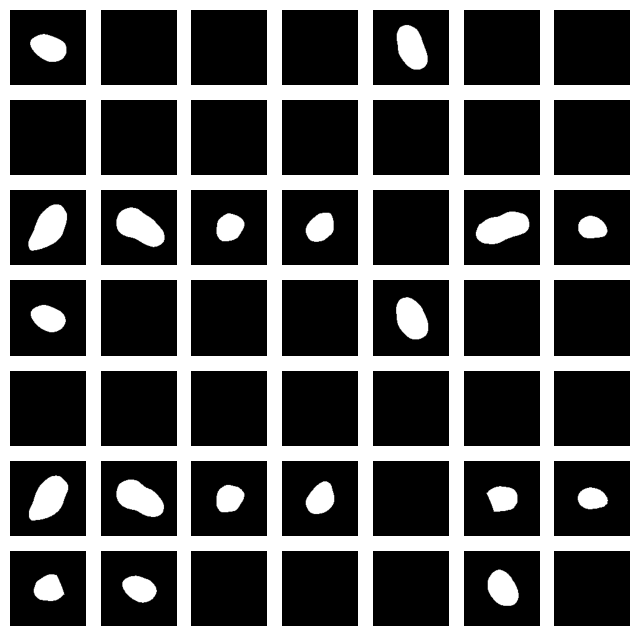

In [9]:
#Check to see if we have the desired results
images = np.load(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\15_percent.npy")

# Define grid size (3x3)
rows, cols = 7, 7
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through images and display them
for i in range(len(images)):  # Ensure we stay within bounds
    axes[i].imshow(images[i], cmap="gray")
    axes[i].axis("off")
    #axes[i].set_title(f"Image {i+1}")

# If there are extra subplots (for fewer images), remove them
for j in range(len(images), len(axes)):
    fig.delaxes(axes[j])  # Delete unused subplots

plt.tight_layout()
plt.show()

In [10]:
#Create a loop so we can append a number representing harmed or
images = np.load(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\15_percent.npy")

harm_or_good15 = []

for i in range(images.shape[0]):
    if np.mean(images[i])>0:
        harm_or_good15.append(1)
    else:
        harm_or_good15.append(0)

for i in range(10):
    print(harm_or_good15[i])
np.save(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\15_percent_labels.npy", harm_or_good15)

1
0
0
0
1
0
0
0
0
0


In [11]:
# Load .npy files for 2nd data

BlueLight2nd = np.load("A:/3rd_Year_Project/Project_code/data/Distinguished_Blue_Zones/2nd_Zones.npy")
loaded_mask_2nd = np.load(r"A:\3rd_Year_Project\Project_code\data\Masks_Data\Numpy format\2nd_light_masks.npy")

In [12]:
#Multiplication Loop
cropped1 = []
framenumber_2nd = []

for framenumber in range(loaded_mask_2nd.shape[0]):
    maskdata = loaded_mask_2nd[framenumber, :, :]  # Correct way to join paths
    # Identify unique regions in mask
    regions = np.unique(np.asarray(maskdata))

    for region in regions[1:]:  # Skip background (assuming it's region 0)
        tempmask = maskdata == region
        label_img = label(tempmask)
        region_props = regionprops(label_img)
        framenumber_2nd.append(framenumber)

        if region_props:  # Ensure there is a valid region
            positions = region_props[0].centroid#

            frame_image = BlueLight2nd[framenumber, :, :]  # Read the image
            maskeddata = np.multiply(frame_image, tempmask)  # Apply mask to #image data#

            x, y = int(positions[0]), int(positions[1])

           #Handle potential out-of-bounds errors when cropping
            x_min = max(0, x - crop_size // 2)
            x_max = min(maskdata.shape[0], x_min + crop_size)
            y_min = max(0, y - crop_size // 2)
            y_max = min(maskdata.shape[1], y_min + crop_size)

            cropped_data = maskeddata[x_min:x_max, y_min:y_max]

            #image = imread(cropped_data, as_gray=True)

            cropped1.append(pad_to_shape(cropped_data))

            #plt.imshow(cropped_data, cmap='gray')  # If it is image-like, e.g., grayscale
            #plt.show()

np.save(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\2nd.npy", cropped1)
np.save(r"A:\3rd_Year_Project\Project_code\data\Cropped_and_variable_labels\framenumber2nd.npy", framenumber_2nd)

IndexError: index 49 is out of bounds for axis 0 with size 49

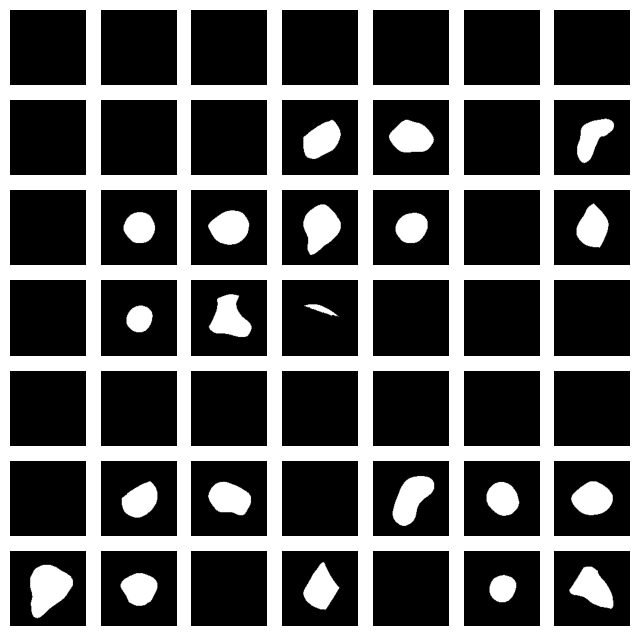

In [13]:
#Check to see if we have the desired results
images = np.load(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\2nd.npy")

# Define grid size (3x3)
rows, cols = 7, 7
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through images and display them
for i in range(len(images)):  # Ensure we stay within bounds
    axes[i].imshow(images[i], cmap="gray")
    axes[i].axis("off")
    #axes[i].set_title(f"Image {i+1}")

# If there are extra subplots (for fewer images), remove them
for j in range(len(images), len(axes)):
    fig.delaxes(axes[j])  # Delete unused subplots

plt.tight_layout()
plt.show()

In [13]:
#Create a loop so we can append a number representing harmed or
images = np.load(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\2nd.npy")

harm_or_good2nd = []

for i in range(images.shape[0]):
    if np.mean(images[i])>0:
        harm_or_good2nd.append(1)
    else:
        harm_or_good2nd.append(0)

for i in range(15):
    print(harm_or_good2nd[i])
np.save(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\2nd_labels.npy", harm_or_good2nd)

0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
